In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('vgsales.csv')

In [ ]:
print(df.columns)

In [3]:
data = df[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].to_numpy()

K-Means

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
print(kmeans.labels_)

[3 9 6 ... 0 0 0]


In [14]:
from sklearn.metrics import silhouette_score
silscore = silhouette_score(data,kmeans.labels_)
print(silscore)

0.8669042238816028


In [10]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

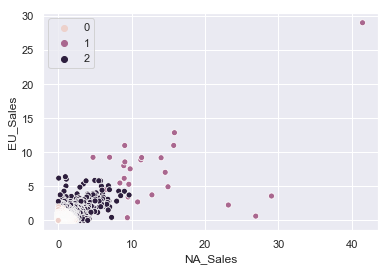

In [15]:
ax = sns.scatterplot(x=df["NA_Sales"],y=df["EU_Sales"],hue=kmeans.labels_)

Gaussian Mixture

In [16]:
from sklearn.mixture import GaussianMixture
gauss = GaussianMixture(n_components=3)
gauss.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
label2 = gauss.fit_predict(data)
print(label2)

[1 1 1 ... 0 0 0]


In [18]:
silscore2 = silhouette_score(data,label2)
print(silscore2)

0.3600578073926572


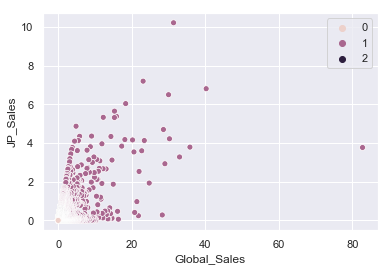

In [19]:
ax = sns.scatterplot(x=df["Global_Sales"],y=df["JP_Sales"],hue=label2)